# K-Nearest Neighbor Lab
Read over the sklearn info on [nearest neighbor learners](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)




In [89]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import urllib.request
import io
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [90]:
def getDataArff(filename):
  readData = arff.loadarff(filename)
  dataDF = pd.DataFrame(readData[0])
  dataDF = dataDF.apply(LabelEncoder().fit_transform)
  dataNP = dataDF.to_numpy()
  length = dataNP.shape[1]
  X = dataNP[:,0:length - 1]
  y = dataNP[:,length - 1]
  return X, y
def getDataCsv(filename):
  dataDF = pd.read_csv(filename)
  dataNP = dataDF.to_numpy()
  length = dataNP.shape[1]
  X = dataNP[:,0:length - 1]
  y = dataNP[:,length - 1]
  return X, y

## 1 K-Nearest Neighbor (KNN) algorithm

### 1.1 (15%) Basic KNN Classification

Learn the [Glass data set](https://archive.ics.uci.edu/dataset/42/glass+identification) using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) with default parameters.
- Randomly split your data into train/test.  Anytime we don't tell you specifics (such as what percentage is train vs test) choose your own reasonable values
- Give typical train and test set accuracies after running with different random splits
- Print the output probabilities for a test set (predict_proba)
- Try it with different p values (Minkowskian exponent) and discuss any differences

In [91]:
X, y = getDataCsv("glass.csv")
mdString = ""
for i in range(5):
  clf = KNeighborsClassifier()
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)
  clf.fit(Xtrain, ytrain)
  trainAcc = round(clf.score(Xtrain, ytrain) * 100, 1)
  testAcc = round(clf.score(Xtest, ytest) * 100, 1)
  mdString += f"|  {i}  | {trainAcc} | {testAcc} |\n"
# print(mdString)
# print("Test Probabilities: \n", clf.predict_proba(Xtest))
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)
mdString = ""
for i in range(1,10):
  clf = KNeighborsClassifier(p=i)
  clf.fit(Xtrain, ytrain)
  trainAcc = round(clf.score(Xtrain, ytrain) * 100, 1)
  testAcc = round(clf.score(Xtest, ytest) * 100, 1)
  mdString += f"|  {i}  | {trainAcc} | {testAcc} |\n"
print(mdString)

|  1  | 98.7 | 96.9 |
|  2  | 98.7 | 95.3 |
|  3  | 98.7 | 95.3 |
|  4  | 98.7 | 95.3 |
|  5  | 98.0 | 95.3 |
|  6  | 98.0 | 95.3 |
|  7  | 98.0 | 95.3 |
|  8  | 98.0 | 95.3 |
|  9  | 98.0 | 95.3 |



***Discussion***:

Accuracy for different runs

| Run | Train Accuracy | Test Accuracy |
| :---: | :---: | :---: |
|  0  | 99.4 | 97.7 |
|  1  | 98.8 | 93.0 |
|  2  | 98.8 | 93.0 |
|  3  | 98.8 | 95.3 |
|  4  | 98.8 | 95.3 |

- The model does quite well with the different runs. Each time, the accuracy is almost perfect for the training set and not far worse for the test set. KNN seems to be a good algorithm for this simple data set. I am interested to see how it fairs with something more difficult.

- As for the predicted probabilities of the test class: it seems like the model is almost 100% certain on the class most of the time. There are only a few rows where more than one class has some probability, and when that happens there don't seem to be more than two classes as possible candidates. I wonder if this is just because of the way the algorithm is set up, that there won't ever be (or will rarely be) two classes that are both "majority" classes. Maybe the model is just configured to only output at most two class probabilities though.

Accuracy for different P values

| Run | Train Accuracy | Test Accuracy |
| :---: | :---: | :---: |
|  1  | 98.0 | 100.0 |
|  2  | 97.3 | 100.0 |
|  3  | 97.3 | 98.4 |
|  4  | 97.3 | 98.4 |
|  5  | 97.3 | 98.4 |
|  6  | 97.3 | 98.4 |
|  7  | 97.3 | 98.4 |
|  8  | 97.3 | 98.4 |
|  9  | 97.3 | 98.4 |

- It doesn't seem like changing the p value does much to change the accuracy. This was just one of the runs that I did. There were many others when the accuracy for all the training sets was 100 or the test sets all had perfect accuracy. From this table, it seems like anything above p=2 is pretty much the same. I wonder how this differs with higher dimensional spaces or with more complex data.

## 2 KNN Classification with normalization and distance weighting

Use the [magic telescope](https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff) dataset

### 2.1 (5%) - Without Normalization or Distance Weighting
- Do random 80/20 train/test splits each time
- Run with k=3 and *without* distance weighting and *without* normalization
- Show train and test set accuracy

In [92]:
X, y = getDataArff("magic.arff")
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(Xtrain, ytrain)

print("Training accuracy: ", round(clf.score(Xtrain, ytrain) * 100, 1))
print("Test accuracy: ", round(clf.score(Xtest, ytest) * 100, 1))

Training accuracy:  89.8
Test accuracy:  81.8


***Discussion***:
The accuracy is not terrible for the training data, though it is not great considering that it is the training data. The accuracy on the test data is quite poor. I think that this may be more due to the fact that we haven't normalized the data, since increasing the number of neighbors did not do much to increase the accuracies.

### 2.2 (10%) With Normalization
- Try it with k=3 without distance weighting but *with* normalization of input features.  You may use any reasonable normalization approach (e.g. standard min-max normalization between 0-1, z-transform, etc.)

In [93]:
X, y = getDataArff("magic.arff")
# scaler = StandardScaler()
scaler = MinMaxScaler()
Xscaled = scaler.fit_transform(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled, y, test_size = .2)

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(Xtrain, ytrain)
print("Training accuracy: ", round(clf.score(Xtrain, ytrain) * 100, 1))
print("Test accuracy: ", round(clf.score(Xtest, ytest) * 100, 1))

Training accuracy:  90.2
Test accuracy:  83.9


***Discussion***:
- I used standardization to normalize my data, giving all the features a mean of 0 and standard deviation of 1. The accuracy for both sets didn't really increase that much (89.3% to 90.5% for the training, 81.2% to 83.3% for the test). The increase in accuracy happened more for the test data than the traini data. So, while normalization may help a little, it doesn't help much.
- I tried again, but with min max scaling to scale the data to a range. That didn't do much better than the standardization of the features.

### 2.3 (10%) With Distance Weighting
- Try it with k=3 and with distance weighting *and* normalization

In [94]:
X, y = getDataArff("magic.arff")
# scaler = StandardScaler()
scaler = MinMaxScaler()
Xscaled = scaler.fit_transform(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled, y, test_size = 0.2)

clf = KNeighborsClassifier(n_neighbors = 3, weights="distance")
clf.fit(Xtrain, ytrain)
print("Training accuracy: ", round(clf.score(Xtrain, ytrain) * 100, 1))
print("Test accuracy: ", round(clf.score(Xtest, ytest) * 100, 1))

Training accuracy:  100.0
Test accuracy:  84.0


***Discussion***:
- I stuck with standardization, because it gave slightly better results than MinMax scaling.
- After adding distance weights, the training accuracy increased to 100%. I was not expecting that. I expected the accuracy to increase by a little, as it has been for the other things I have been changing.
- The test set accuracy was still pretty poor, only 83%. This did not change really at all from the last run. I did not expect this. I expected a small increase in the accuracy, but an increase nonetheless.
- Distance weighting seems to do a good job of making the training data fit, but not the test data.
- Even after changing the normalization to be MinMax, the test accuracy barely improves. Distance weigthing seems to only favor the training set, at least with this data.

### 2.4 (10%) Different k Values
- Using your normalized data with distance weighting, create one graph with classification accuracy on the test set on the y-axis and k values on the x-axis.
- Use values of k from 1 to 15.  Use the same train/test split for each.

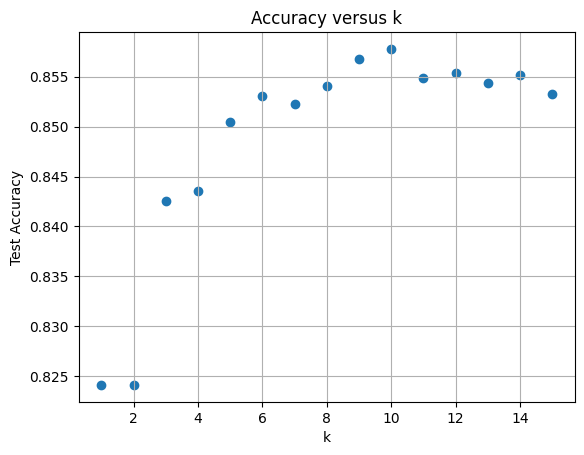

In [95]:
X, y = getDataArff("magic.arff")
scaler = MinMaxScaler()
Xscaled = scaler.fit_transform(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled, y, test_size = 0.2)

plotX = np.arange(1,16)
plotY = np.array([])

for k in range(1,16):
  clf = KNeighborsClassifier(n_neighbors = k, weights="distance")
  clf.fit(Xtrain, ytrain)
  score = clf.score(Xtest, ytest)
  plotY = np.append(plotY, score)

# print(plotX, plotY)

plt.plot()
plt.scatter(plotX, plotY)
plt.title("Accuracy versus k")
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.grid()
plt.show()

***Discussion***:
- I left the normalization as MinMax, since it did have a slight advantage compared to Standardization when I did distance weighting.
- The accuracy starts super low for the first few k values.
- It starts to get higher around k = 3, but then levels out around 84% around k = 8 to k = 15. There is some noise, some variability, in that range, but nothing drastic.
- Just for fun, I increased k drastically (up to 44), and found that the accuracy went on a slow decline back to around teh accuracy of k = 3.
- Changing k helps to an extent, but it definitely does not solve all the problems with the limitations of KNN.

## 3 KNN Regression with normalization and distance weighting

Use the [sklean KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) on the [housing price prediction](https://axon.cs.byu.edu/data/uci_regression/housing.arff) problem.  
### 3.1 (5%) Ethical Data
Note this data set has an example of an inappropriate input feature which we discussed.  State which feature is inappropriate and discuss why.

***Discussion***:
- The innapropriate feature is the percentage of black people in the population.
- This is innapropriate because in the past it may have been a factor in the home prices because of racial prejudice of some people.
- However, it in itself is not a factor that should have a bearing on the home prices. (If the argument is that Black people commit more crimes, then some feature along those lines [number of crimes committed in the area] would be a more suitable feature to use)

### 3.2 (15%) - KNN Regression
- Do random 80/20 train/test splits each time
- Run with k=3
- Print the score (coefficient of determination) and Mean Absolute Error (MAE) for the train and test set for the cases of
  - No input normalization and no distance weighting
  - Normalization and no distance weighting
  - Normalization and distance weighting
- Normalize inputs features where needed but do not normalize the output

In [96]:
X, y = getDataArff("housing.arff")
scaler = MinMaxScaler()
# scaler = StandardScaler()
X = scaler.fit_transform(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

# clf = KNeighborsRegressor(n_neighbors = 3)
clf = KNeighborsRegressor(n_neighbors = 3, weights = "distance")
clf.fit(Xtrain, ytrain)
print("|", round(clf.score(Xtrain, ytrain) * 100, 1), "|", round(clf.score(Xtest, ytest) * 100, 1), "|", round(mean_absolute_error(ytrain, clf.predict(Xtrain)), 1), "|", round(mean_absolute_error(ytest, clf.predict(Xtest)), 1), "|", sep = "")

|100.0|79.5|0.0|18.4|


***Discussion***:

| Method | Train Accuracy | Test Accuracy | Train MAE | Test MAE |
| :---: | :---: | :---: | :---: | :---: |
| No normalization/No distance weighting|90.9|81.5|12.4|18.7|
| MinMax normalization/No distance weighting|90.3|81.1|13.1|18.8|
| Standard normalization/No distance weighting|89.8|80.8|13.3|20.0|
| MinMax normalization/distance weighting|100.0|81.6|0.0|16.8|

- I chose to use MinMax normalization with the distnace weighting because it worked better than the standard normalization when there was no distance weighting.
- Again, it seems like distnace weighting causes a great improvement in the training accuracy and MAE, but not so for the test set.
- The test set accuracy and MAE stay pretty constant throughout the trials. I don't think that normalization and distance weighting, at least how I am doing them, work very well to improve the predictions on the test set.
- It is interesting to see that distance weighting, as before, had a much greater impact on the training set prediction accuracy and MAE than did the different normalization methods. The normalization even seemed to cause a slight decrease in the accuracy and it raised the MAE as well. I would say that suggest the model is getting more generalizable, but those things didn't help the test set at all really.

### 3.3 (10%)  Different k Values
- Using housing with normalized data and distance weighting, create one graph with MAE on the test set on the y-axis and k values on the x-axis
- Use values of k from 1 to 15.  Use the same train/test split for each.

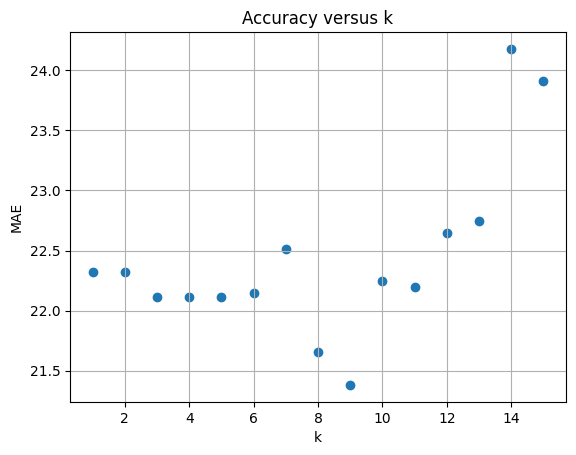

In [97]:
X, y = getDataArff("housing.arff")
scaler = MinMaxScaler()
Xscaled = scaler.fit_transform(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled, y, test_size = 0.2)

plotX = np.arange(1,16)
plotY = np.array([])

for k in range(1,16):
  clf = KNeighborsClassifier(n_neighbors = k, weights="distance")
  clf.fit(Xtrain, ytrain)
  mae = mean_absolute_error(ytest, clf.predict(Xtest))
  plotY = np.append(plotY, mae)

plt.plot()
plt.scatter(plotX, plotY)
plt.title("Accuracy versus k")
plt.xlabel("k")
plt.ylabel("MAE")
plt.grid()
plt.show()

***Discussion***:
- It was interesting to see the effect that the k value had on the MAE. It started out not too high with a small k.
- At around k = 4 to 6, the MAE dropped to its lowest (though it was still up around 24, so not super low)
- Then, the greater k values only led to greater MAE.
- It is easy to see that having a greater k is not necessarily helpful. We have to choose a k value that minimizes the MAE, and that really just takes a guess-and-check approach to find. (that's not surprising since a lot of machine learning seems to be finding the best hyperparameters for a specific situation)

## 4. (20%) KNN with nominal and real data

- Use the [lymph dataset](https://axon.cs.byu.edu/data/uci_class/lymph.arff)
- Use a 80/20 split of the data for the training/test set
- This dataset has both continuous and nominal attributes
- Implement a distance metric which uses Euclidean distance for continuous features and 0/1 distance for nominal. Hints:
    - Write your own distance function (e.g. mydist) and use clf = KNeighborsClassifier(metric=mydist)
    - Change the nominal features in the data set to integer values since KNeighborsClassifier expects numeric features. I used Label_Encoder on the nominal features.
    - Keep a list of which features are nominal which mydist can use to decide which distance measure to use
    - There was an occasional bug in SK version 1.3.0 ("Flags object has no attribute 'c_contiguous'") that went away when I upgraded to the lastest SK version 1.3.1
- Use your own choice for k and other parameters

In [98]:
readData = arff.loadarff("lymph.arff")
dataDF = pd.DataFrame(readData[0])
dataNP = dataDF.to_numpy()
length = dataNP.shape[1]
X = dataNP[:,0:length - 1]
y = dataNP[:,length - 1]

for i in range(0,X.shape[1]):
  if type(X[0][i]) == bytes:
    X[:,i] = LabelEncoder().fit_transform(X[:,i])

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = LabelEncoder().fit_transform(y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

def mydist(x, y):
  nomDist = 0
  conDist = 0
  dist = 0
  for i in range(0, x.shape[0]):
    if type(x[i]) == np.int64:
      if not (x[i] == y[i]):
        nomDist += 1
        dist += 1
      else:
        conDist += (x[i] - y[i])**2
        dist += (x[i] - y[i])**2
  conDist = conDist**0.5
  # return nomDist + conDist
  return dist

clf = KNeighborsClassifier(metric = mydist, n_neighbors = 3, weights = "distance")
clf.fit(Xtrain, ytrain)
clf.score(Xtest, ytest)

0.7666666666666667

***Discussion***:
- I used k = 3, since it seems to work well for other data sets
- I used distance weighting, since it increases training accuracy without really affecting test accuracy (and typically improving it slightly if anything)
- I used MinMax normalization because it has worked better than Standard normalization for the other data sets

- My metric: I used 0/1 ditance for each nominal value, 0 being if the attributes were the same between the two points and 1 being if they were different.
  - I found the 0/1 distance for each nominal value and summed those.
  - I found the (x-y)^2 for each continuous value and summed them. At the end, I took the square root of that sum.
  - Then, I added the 0/1 distances and the Euclidean distance from all the continuous values and returned that.
- I think I did something wrong in my distance function. I am getting terrible accuracy on both my training set and test set (I get 100% on my training set when I run it with a normal distance metric, not my own).
- I think I am missing something about how to combine the distance between features when I have both continuous and nominal.
- I changed it to pretend that the 0/1 distance was added to the (x-y)^2 for the continuous variables, summing those all and taking the square root at the end. This increased my accuracy by a lot (from 42% to 66% on the test set).
- My conclusion, I have not written a great distance function, but I can find ways to improve it.